In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#import xgboost as xgb


load the dataset

In [7]:
# house_price_dataset = sklearn.datasets.load_boston()
house_price_dataset = load_boston()


C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

In [8]:
print(house_price_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [9]:
# loading the dataset to a pandas dataFrame
house_price_dataframe=pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)
house_price_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
# adding target(house price) attribudes/column to the dataFrame
house_price_dataframe['PRICE']=house_price_dataset.target
house_price_dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
# checking the missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
# statistical measures of dataset
house_price_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Ubderstanding the correlation between various features in the dataset

Type of correlation
1. positive correlation 
2. negative correlation

In [13]:
correlation=house_price_dataframe.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

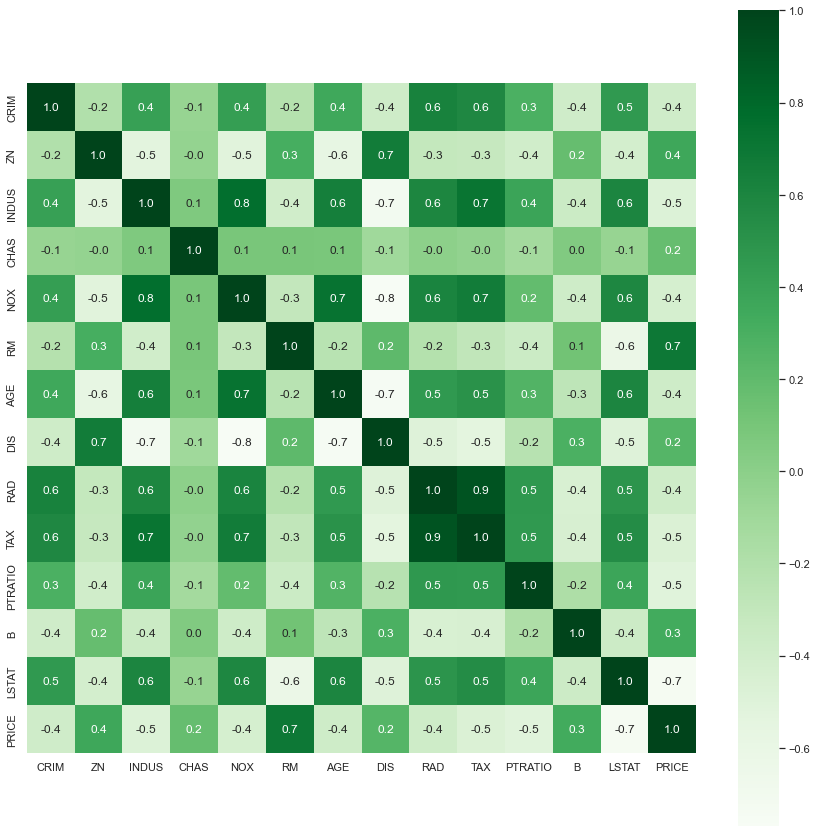

In [14]:
# constracting a heatmap to understand the correlation
sns.set(style='white')
plt.figure(figsize=(15,15))
sns.heatmap(correlation,square=True,fmt='0.1f',annot=True,annot_kws={'size':12},cmap='Greens')

<AxesSubplot:>

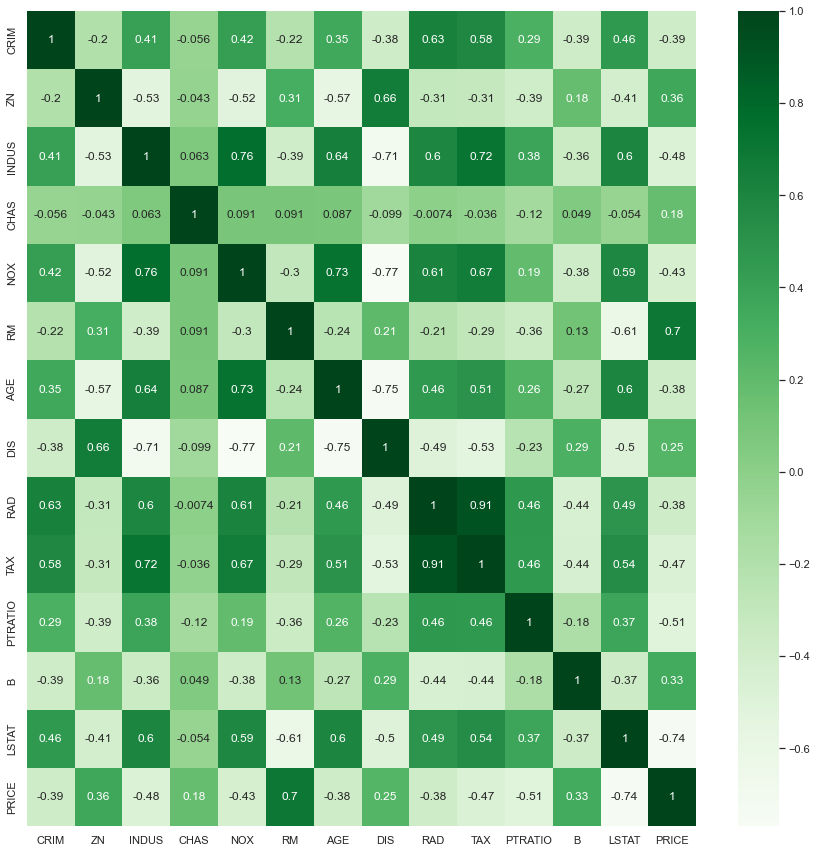

In [15]:
# constracting a heatmap to understand the correlation
#sns.set(style='white')
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True,cmap='Greens')

Spliting data and target columns

In [16]:
# drop price column
x=house_price_dataframe.drop(['PRICE'],axis=1)
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [17]:
# separating price column
y=house_price_dataframe['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

# Spliting data into training and testing

In [18]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=2)

In [19]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
37,0.08014,0.0,5.96,0.0,0.499,5.850,41.5,3.9342,5.0,279.0,19.2,396.90,8.77
286,0.01965,80.0,1.76,0.0,0.385,6.230,31.5,9.0892,1.0,241.0,18.2,341.60,12.93
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,396.90,12.01
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47


In [20]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
463,5.82115,0.0,18.10,0.0,0.713,6.513,89.9,2.8016,24.0,666.0,20.2,393.82,10.29
152,1.12658,0.0,19.58,1.0,0.871,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
291,0.07886,80.0,4.95,0.0,0.411,7.148,27.7,5.1167,4.0,245.0,19.2,396.90,3.56
183,0.10008,0.0,2.46,0.0,0.488,6.563,95.6,2.8470,3.0,193.0,17.8,396.90,5.68
384,20.08490,0.0,18.10,0.0,0.700,4.368,91.2,1.4395,24.0,666.0,20.2,285.83,30.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.01778,95.0,1.47,0.0,0.403,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
129,0.88125,0.0,21.89,0.0,0.624,5.637,94.7,1.9799,4.0,437.0,21.2,396.90,18.34
194,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38


# Modeling

XCBoost

In [21]:
# loding xgboost
model=XGBRegressor()

In [22]:
# train the model
model.fit(x_train, y_train)

C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [23]:
y_train

321    23.1
37     21.0
286    20.1
2      34.7
25     13.9
       ... 
22     15.2
72     22.8
493    21.8
15     19.9
168    23.8
Name: PRICE, Length: 404, dtype: float64

# prediction on training data

In [24]:
# prediction on training data
training_data_prediction=model.predict(x_train)
training_data_prediction

C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([23.147501 , 20.99463  , 20.090284 , 34.69053  , 13.903663 ,
       13.510157 , 21.998634 , 15.1940975, 10.899711 , 22.709627 ,
       13.832816 ,  5.592794 , 29.810236 , 49.99096  , 34.89215  ,
       20.607384 , 23.351097 , 19.23555  , 32.695698 , 19.641418 ,
       26.991022 ,  8.401829 , 46.00729  , 21.708961 , 27.062933 ,
       19.321356 , 19.288303 , 24.809872 , 22.61626  , 31.70493  ,
       18.542515 ,  8.697379 , 17.395294 , 23.700663 , 13.304856 ,
       10.492197 , 12.688369 , 25.016556 , 19.67495  , 14.902088 ,
       24.193798 , 25.007143 , 14.900281 , 16.995798 , 15.6009035,
       12.699232 , 24.51537  , 14.999952 , 50.00104  , 17.525454 ,
       21.184624 , 31.998049 , 15.613355 , 22.89754  , 19.325378 ,
       18.717896 , 23.301125 , 37.222923 , 30.09486  , 33.102703 ,
       21.00072  , 49.999332 , 13.405827 ,  5.0280113, 16.492886 ,
        8.405072 , 28.64328  , 19.499939 , 20.586452 , 45.402164 ,
       39.79833  , 33.407326 , 19.83506  , 33.406372 , 25.2714

# accuracy checking

In [25]:
# R squared error
R_score=metrics.r2_score(y_train,training_data_prediction)
R_score

0.9999948236320982

In [26]:
# Mean Absolute Error
MAE_score=metrics.mean_absolute_error(y_train, training_data_prediction)
MAE_score

0.0145848437110976

# prediction on test data

In [27]:
test_data_prediction=model.predict(x_test)
test_data_prediction

C:\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([20.288406 , 20.60247  , 30.9758   , 29.910797 ,  8.624953 ,
       14.235525 , 23.523052 , 29.730324 , 31.97293  , 22.015892 ,
       27.946804 , 24.034412 , 20.771402 , 21.849985 , 12.024127 ,
       22.074675 , 18.487509 , 11.052485 ,  8.141267 , 15.730722 ,
       23.163914 , 20.233883 , 35.700928 , 19.041637 , 15.129744 ,
       20.228016 , 47.067314 , 30.426474 , 32.729023 , 17.345776 ,
       17.889462 , 19.40687  , 30.769133 , 25.431686 , 12.05332  ,
       17.900238 , 11.031679 , 21.109531 , 20.64321  , 21.982754 ,
       25.016281 , 12.648555 , 31.042107 ,  7.106914 , 18.685764 ,
       14.380013 , 34.902393 , 16.130005 , 32.98537  , 10.950912 ,
       27.335018 , 29.399937 ,  7.0065055, 35.398712 , 22.978228 ,
       18.582758 , 19.224293 , 20.003431 , 15.341814 , 22.38517  ,
       19.077105 , 21.955967 , 18.91404  , 32.77595  , 32.76772  ,
       24.36317  , 48.262913 , 23.385014 , 10.551914 , 22.664684 ,
       14.671612 ,  8.881822 , 16.700302 , 17.221045 , 26.2046

In [28]:
y_test

463    20.2
152    15.3
291    37.3
183    32.5
384     8.8
       ... 
200    32.9
12     21.7
129    14.3
194    29.1
320    23.8
Name: PRICE, Length: 102, dtype: float64

In [29]:
# R square error
R_score_test=metrics.r2_score(y_test,test_data_prediction)
print(R_score_test)


0.8711660369151691


In [30]:
# MAE ckecking
MEA_score_test=metrics.mean_absolute_error(y_test,test_data_prediction)
MEA_score_test

2.2834744154238233

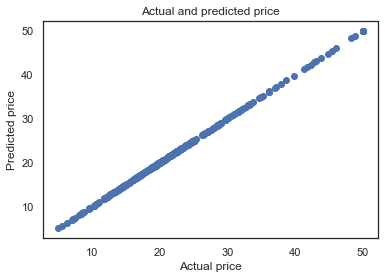

In [31]:
# train data Visualization 
plt.scatter(y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual and predicted price')
plt.show()

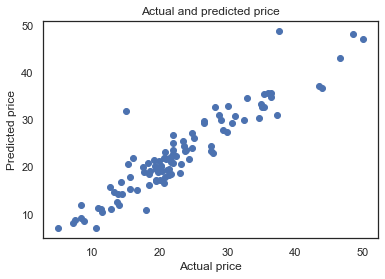

In [32]:
# train data Visualization 
plt.scatter(y_test,test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual and predicted price')
plt.show()